**The task at hand is to help optimize marketing expenses for Yandex.Afisha platform.**  

**We have the following data files:**  
•	Server logs with data on Yandex.Afisha visits from June 2017 through May 2018. They are stored in 'visits' table.
•	Dump file with all orders for the period. The file is named 'orders'.   
•	Marketing expenses statistics. The table is called 'costs'.  

**We are going to study:**   
•	How people use the product   
•	When they start to buy   
•	How much money each customer brings   
•	When they pay off

Data sources:  
/datasets/visits_log_us.csv  
/datasets/orders_log_us.csv  
/datasets/costs_us.csv

## Downloading the data and preparing it for analysis

In [1]:
!pip install sidetable

In [2]:
#Let's download relevant libraries
import pandas as pd
import numpy as np
from datetime import datetime
import sidetable
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings(action='ignore')

**Let's look at the data:**

In [3]:
visits = pd.read_csv('/datasets/visits_log_us.csv', nrows=500)

In [4]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     500 non-null    object
 1   End Ts     500 non-null    object
 2   Source Id  500 non-null    int64 
 3   Start Ts   500 non-null    object
 4   Uid        500 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 113.1 KB


In [5]:
visits.head()

Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

In [6]:
visits['Device'].value_counts()

desktop    363
touch      137
Name: Device, dtype: int64

Let's optimize the 'visits' dataset to minimize the memory usage:

In [7]:
visits = pd.read_csv('/datasets/visits_log_us.csv',    
    dtype={'Device': 'category'},
    parse_dates=['Start Ts', 'End Ts'])

Let's look at the dataset after optimization.

In [8]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


Let's look at the 'orders' and 'costs' table and optimize the data as well:

In [9]:
orders = pd.read_csv('/datasets/orders_log_us.csv', nrows=500)

In [10]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   500 non-null    object 
 1   Revenue  500 non-null    float64
 2   Uid      500 non-null    uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 45.0 KB


In [11]:
orders.head()

Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

In [12]:
orders = pd.read_csv('/datasets/orders_log_us.csv',
    parse_dates=['Buy Ts'])

In [13]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [14]:
costs = pd.read_csv('/datasets/costs_us.csv', nrows=500)

In [15]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  500 non-null    int64  
 1   dt         500 non-null    object 
 2   costs      500 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 40.7 KB


In [16]:
costs.head()

source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08

In [17]:
costs = pd.read_csv('/datasets/costs_us.csv',
    parse_dates=['dt'])

In [18]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


**Checking for missing values:**

In [19]:
visits.stb.missing(style=True)

In [20]:
orders.stb.missing(style=True)

In [21]:
costs.stb.missing(style=True)

No missing values detected in the datasets.

## Making reports and calculating metrics

### Product

Let's research the product and answer the following question:  
1. How many people use it every day, week, and month?   
2. How many sessions are there per day?
3. What is the length of each session?   
4. What's the user retention rate?


To answer these question, we will analyze the 'visits' table. At this stage, we want to know how many visitors does the platform have every day, week, and month.

In [22]:
visits['Start Ts'].describe()

count                  359400
unique                 224303
top       2017-11-24 16:06:00
freq                       19
first     2017-06-01 00:01:00
last      2018-05-31 23:59:00
Name: Start Ts, dtype: object

To be able to analyse daily, weekly, and monthly activity, as will transform the dates to datetime type and single out days, weeks, and months.

In [23]:
visits['session_year']  = visits['Start Ts'].dt.isocalendar().year
visits['session_month']  = visits['Start Ts'].astype('datetime64[M]')
visits['session_week']  = visits['Start Ts'].astype('datetime64[W]')
visits['session_date']  = visits['Start Ts'].dt.date
visits['session_date'] = pd.to_datetime(visits['session_date'])
visits.head()

Device              End Ts  Source Id            Start Ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    Uid  session_year session_month session_week session_date  
0  16879256277535980062          2017    2017-12-01   2017-12-14   2017-12-20  
1    104060357244891740          2018    2018-02-01   2018-02-15   2018-02-19  
2   7459035603376831527          2017    2017-07-01   2017-06-29   2017-07-01  
3  16174680259334210214          2018    2018-05-01   2018-05-17   2018-05-20  
4   9969694820036681168          2017    2017-12-01   2017-12-21   2017-12-27

#### DAU

Let's find number of daily active users.

In [24]:
dau_avg=visits.groupby(visits['session_date'])['Uid'].nunique().mean().round().astype(int)
print('Average daily active users', dau_avg)

Average daily active users 908


Let's build a graph that will show the dynamics of DAU over time.

In [25]:
dau=visits.groupby(visits['session_date'])['Uid'].nunique().reset_index()
dau.columns = ['date', 'users']
dau.head()

date  users
0 2017-06-01    605
1 2017-06-02    608
2 2017-06-03    445
3 2017-06-04    476
4 2017-06-05    820

Text(0.5, 0, 'Date')

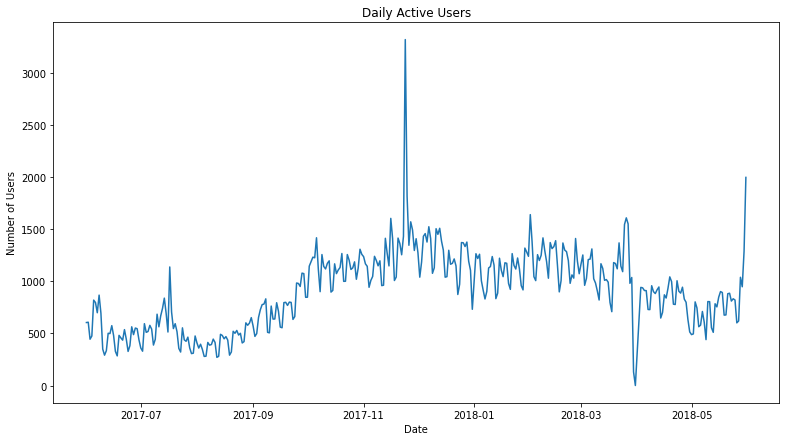

In [26]:
plt.figure(figsize=(13,7))
ax = sns.lineplot(data=dau, x="date", y="users")
plt.title('Daily Active Users')
plt.ylabel('Number of Users')
plt.xlabel('Date')

There are little over 900 daily active users at the Yandex.Afisha platform. From the visualization we can see that the number of DAU had a steady growth starting from September through Nov 2017 and then spiked dramatically to over 3,000 around the end of November 2017, as which point it had a slight decrease through December 2017 - March 2018. The DAU dropped around April 2018. August 2017 also has quite low number of DAU, comparing to other months. It seems that September to March were the most active months. 

#### WAU

Let's find number of weekly active users.

In [27]:
wau_avg=visits.groupby(visits['session_week'])['Uid'].nunique().mean().round().astype(int)
print('Average weekly active users', wau_avg)

Average weekly active users 5724


Let's build a graph that will show the dynamics of WAU over time.

In [28]:
wau = visits.groupby(['session_week'])['Uid'].nunique().reset_index()
wau.columns = ['week', 'users']
wau.head()

week  users
0 2017-06-01   4082
1 2017-06-08   3311
2 2017-06-15   2844
3 2017-06-22   3079
4 2017-06-29   3055

Text(0.5, 0, 'Week')

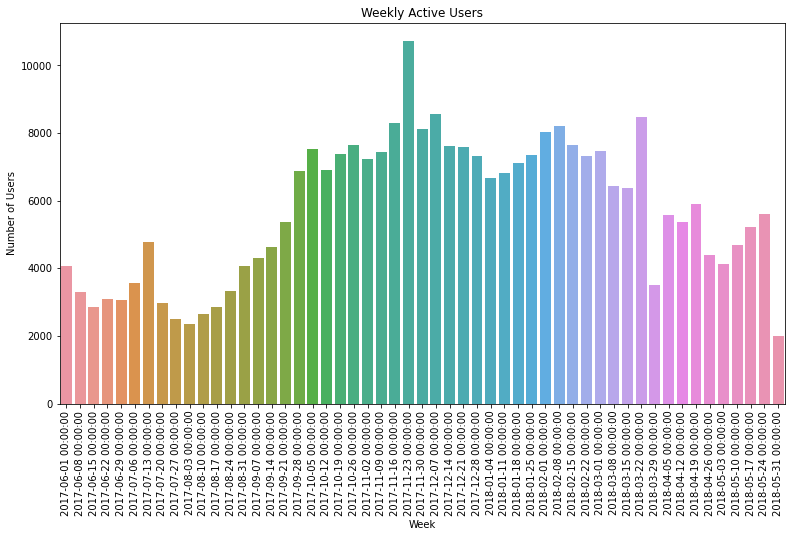

In [29]:
plt.figure(figsize=(13,7))
ax = sns.barplot(data=wau, x="week", y="users")
ax.set_xticklabels(wau.week,rotation=90)
plt.title('Weekly Active Users')
plt.ylabel('Number of Users')
plt.xlabel('Week')

There are little over 5,700 weekly active users at the Yandex.Afisha platform. From the visualization we can see that the number of WAU had a steady growth from mid-August through Nov 2017 with a spike on the week of Nov-23 spiked to 10,000, as which point it had a slight decrease through January-March 2018. The WAU dropped on the week of Mar-29, 2018. The weeks in the beginning of August 2017 and end of May 2018 have the lowest number of active users - around 2000.

#### MAU

Let's find number of monthly active users.

In [30]:
mau_avg=visits.groupby(visits['session_month'])['Uid'].nunique().mean().round().astype(int)
print('Average monthly active users', mau_avg)

Average monthly active users 23228


Let's build a graph that will show the dynamics of MAU over time.

In [31]:
mau = visits.groupby(['session_month'])['Uid'].nunique().reset_index()
mau.columns = ['month', 'users']
mau

month  users
0  2017-06-01  13259
1  2017-07-01  14183
2  2017-08-01  11631
3  2017-09-01  18975
4  2017-10-01  29692
5  2017-11-01  32797
6  2017-12-01  31557
7  2018-01-01  28716
8  2018-02-01  28749
9  2018-03-01  27473
10 2018-04-01  21008
11 2018-05-01  20701

Text(0.5, 0, 'Month')

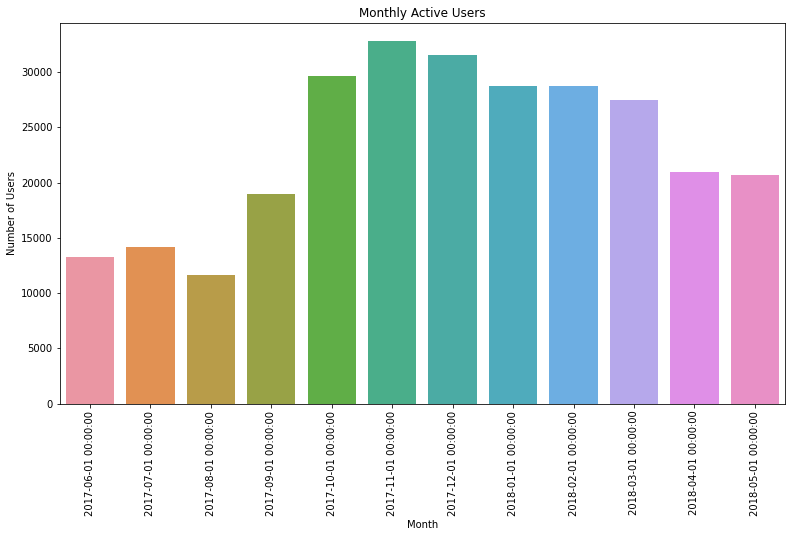

In [32]:
plt.figure(figsize=(13,7))
ax = sns.barplot(data=mau, x="month", y="users")
ax.set_xticklabels(mau.month,rotation=90)
plt.title('Monthly Active Users')
plt.ylabel('Number of Users')
plt.xlabel('Month')

There are over 23,000 monthly active users at the Yandex.Afisha platform. From the visualization we can see that August 2017 had the lowest number of active users, and the number of MAU had a steady growth through Sept - Nov 2017, whith November being the most active month with around 30,000 users, as which point it had a slight and steady decrease through January-April 2018. The MAU dropped around April 2018. It seems that October to March were the most active months. Maybe, it's a seasonal activity during colder months.

#### Daily Sessions

Let's find out how many sessions are there per day.

In [33]:
daily_sessions_avg = visits.groupby(['session_date'])['Uid'].count().mode().round().astype(int)
print(daily_sessions_avg)

0    884
1    943
dtype: int64


Let's build a graph that will show the dynamics of number of sessions per day over time.

In [34]:
daily_sessions = visits.groupby(['session_date'])['Uid'].count().reset_index()
daily_sessions.columns = ['date', 'sessions']
daily_sessions

date  sessions
0   2017-06-01       664
1   2017-06-02       658
2   2017-06-03       477
3   2017-06-04       510
4   2017-06-05       893
..         ...       ...
359 2018-05-27       672
360 2018-05-28      1156
361 2018-05-29      1035
362 2018-05-30      1410
363 2018-05-31      2256

[364 rows x 2 columns]

Text(0.5, 0, 'Date')

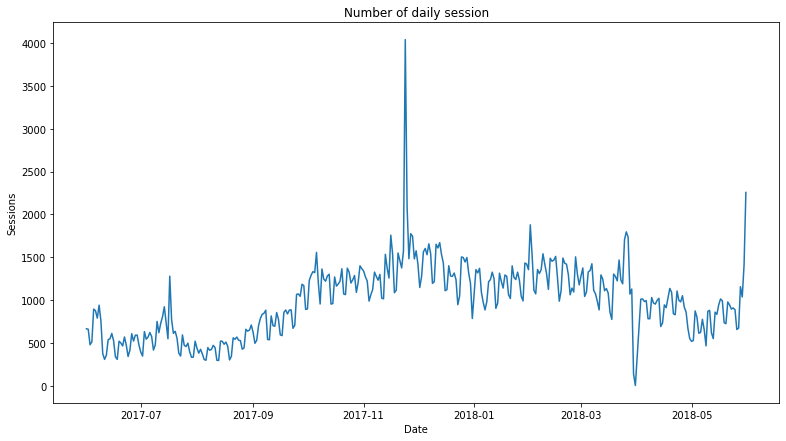

In [35]:
plt.figure(figsize=(13,7))
ax = sns.lineplot(data=daily_sessions, x="date", y="sessions")
plt.title('Number of daily session')
plt.ylabel('Sessions')
plt.xlabel('Date')

For the daily sessions, we can see similar dynamics as for the daily users, with an average of over 900 sessions and a spike around the end of November 2017 to over 4,000 daily sessions. We can see the same drop in the daily sessions around April 2018, just as for the users, which is logical: the number of DAU dropped, and so is the number of daily sessions.

**Sessions per user per day**

In [36]:
dau_new=visits.groupby(visits['session_date'])['Uid'].count().reset_index()
dau_new.columns = ['date', 'sessions']
dau_new = dau_new.merge(dau, on='date')
dau_new['sessions_per_user']=dau_new['sessions']/dau_new['users']
dau_new.head()

date  sessions  users  sessions_per_user
0 2017-06-01       664    605           1.097521
1 2017-06-02       658    608           1.082237
2 2017-06-03       477    445           1.071910
3 2017-06-04       510    476           1.071429
4 2017-06-05       893    820           1.089024

In [37]:
avg_ses_per_users = dau_new['sessions_per_user'].mode().round(2)
print(avg_ses_per_users)

0    1.07
dtype: float64


Average number of sessions per user per day is 1.07.

Let's build a graph that will show the dynamics of number of sessions per user per day over time.

Text(0.5, 0, 'Date')

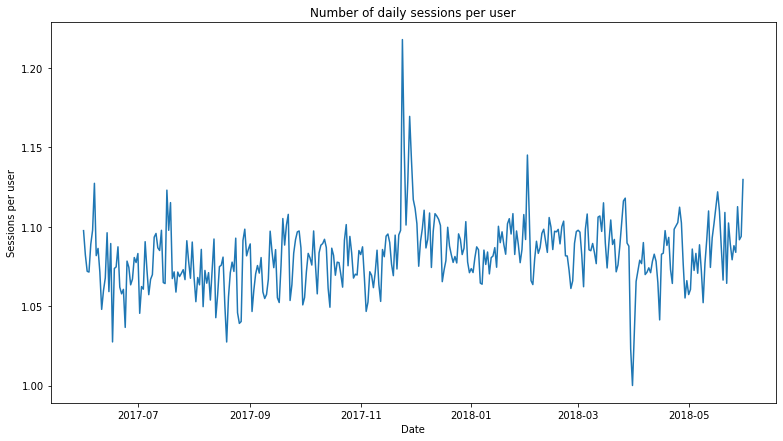

In [38]:
plt.figure(figsize=(13,7))
ax = sns.lineplot(data=dau_new, x="date", y="sessions_per_user")
plt.title('Number of daily sessions per user')
plt.ylabel('Sessions per user')
plt.xlabel('Date')

As for the sessions per user per day, the average number of sessions is a little over 1 session. This means that average user visits the platform about once a day, some users visit the platform more than once.   
Despite the optical spike in user daily sessions around the end of December, the difference is insignificant between 1.10 and 1.20 daily sessions per user. And even at the least active period - April 2018, an average user visited the platform once a day.

Let's visualize the dynamics of the DAU and daily sessions.

Text(0.5, 0, 'Date')

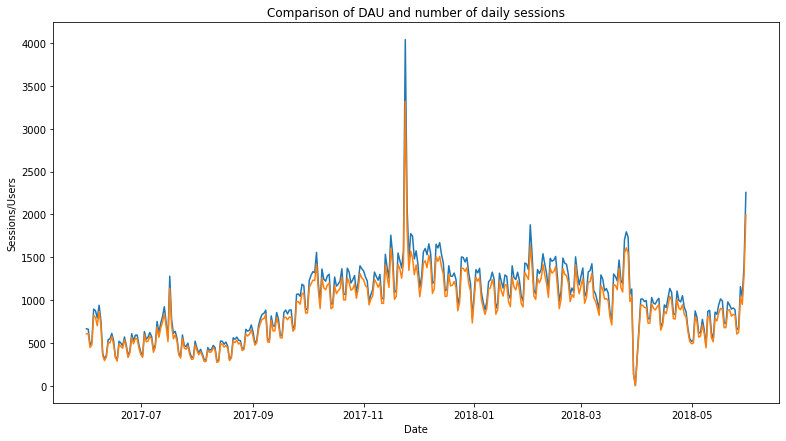

In [39]:
plt.figure(figsize=(13,7))
ax = sns.lineplot(data=dau_new, x="date", y="sessions")
ax = sns.lineplot(data=dau_new, x="date", y="users")
plt.title('Comparison of DAU and number of daily sessions')
plt.ylabel('Sessions/Users')
plt.xlabel('Date')

Let's compare the overall trend of sessions per user with DAU.

Text(0.5, 0, 'Date')

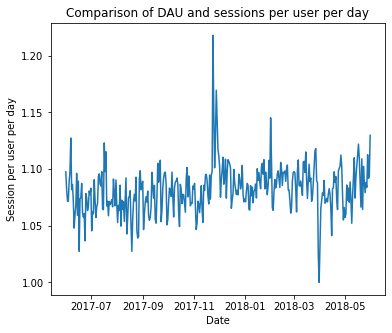

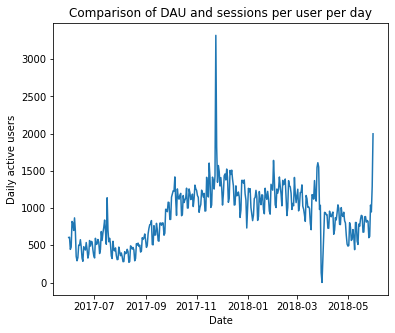

In [40]:
plt.figure(figsize=(6,5))
ax = sns.lineplot(data=dau_new, x="date", y="sessions_per_user")
plt.title('Comparison of DAU and sessions per user per day')
plt.ylabel('Session per user per day')
plt.xlabel('Date')

plt.figure(figsize=(6,5))
ax = sns.lineplot(data=dau_new, x="date", y="users")
plt.title('Comparison of DAU and sessions per user per day')
plt.ylabel('Daily active users')
plt.xlabel('Date')

As we can see from the calculations and from the visualizations above, the number of daily sessions and the DAU are almost the same, the graphs' trends are almost identical for these two metrics. This means that there was on average one session per user per day.

#### Length of the session

Let's calculate the length of the visit sessions by finding the difference between Start Ts and End Ts for each session, amd calculate the average difference.

In [41]:
visits['session_length'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds
visits.head()

Device              End Ts  Source Id            Start Ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    Uid  session_year session_month session_week session_date  \
0  16879256277535980062          2017    2017-12-01   2017-12-14   2017-12-20   
1    104060357244891740          2018    2018-02-01   2018-02-15   2018-02-19   
2   7459035603376831527          2017    2017-07-01   2017-06-29   2017-07-01   
3  16174680259334210214          2018    2018-05-01   2018-05-17   2018-05-20   
4   9969694820036681168          2017    2017-12-01   2017-12-21   2017-12-27   

   session_length  
0            1080  
1            1680  
2               0  
3            1440  
4               0

In [42]:
visits['session_length'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_length, dtype: float64

It seems that 25% of the users have sessions 120 second or under. 120 seconds is 2 minutes. We can easily calculate that. However, 84,480 is a lot of secconds and we can't imagine how long it is. Let's convert seconds into minutes to understand the session length better.

In [43]:
visits['session_length'] = (visits['session_length']/60).round(2)
visits.head()

Device              End Ts  Source Id            Start Ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    Uid  session_year session_month session_week session_date  \
0  16879256277535980062          2017    2017-12-01   2017-12-14   2017-12-20   
1    104060357244891740          2018    2018-02-01   2018-02-15   2018-02-19   
2   7459035603376831527          2017    2017-07-01   2017-06-29   2017-07-01   
3  16174680259334210214          2018    2018-05-01   2018-05-17   2018-05-20   
4   9969694820036681168          2017    2017-12-01   2017-12-21   2017-12-27   

   session_length  
0            18.0  
1            28.0  
2             0.0  
3            24.0  
4             0.0

In [44]:
print('Everage session length', (visits['session_length'].mean().round(2)), 'minutes.')

Everage session length 10.73 minutes.


In [45]:
visits['session_length'].describe()

count    359400.000000
mean         10.725116
std          16.938908
min           0.000000
25%           2.000000
50%           5.000000
75%          14.000000
max        1408.000000
Name: session_length, dtype: float64

Text(0.5, 0, 'Length of session')

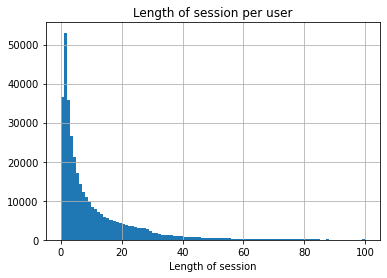

In [46]:
visits['session_length'].hist(bins=100, range=(0,100))
plt.title('Length of session per user')
plt.xlabel('Length of session')

As per data above, the average session length is 10.73 minutes. However, the histogram is skewed to the right due to the outliers on the upper side with very long sessions. 50% of the users have sessions of 5 mins and under, and 75% of users have sessions of 14 minutes or under.

Let's visualize the session length dynamics over time.

In [47]:
session_length_avg = visits.groupby(['session_date'])['session_length'].mean().reset_index()
session_length_avg

session_date  session_length
0     2017-06-01       11.105361
1     2017-06-02       10.330699
2     2017-06-03       10.115975
3     2017-06-04        9.238510
4     2017-06-05       10.407525
..           ...             ...
359   2018-05-27        9.282738
360   2018-05-28       10.546990
361   2018-05-29       10.490473
362   2018-05-30       10.678468
363   2018-05-31       12.329238

[364 rows x 2 columns]

Text(0.5, 0, 'Date')

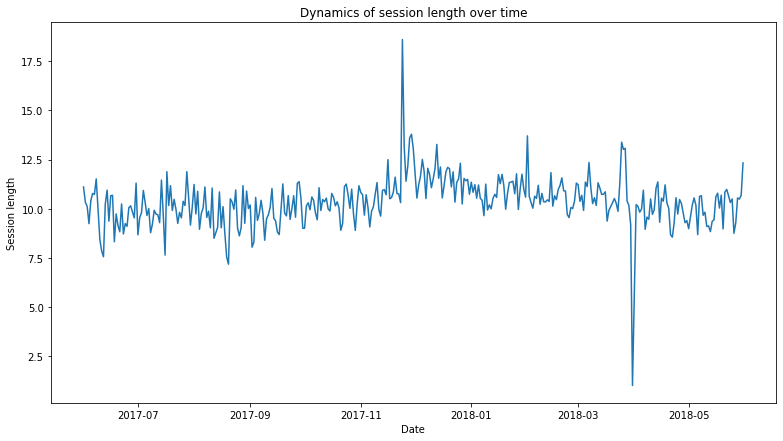

In [48]:
plt.figure(figsize=(13,7))
ax = sns.lineplot(data=session_length_avg, x="session_date", y="session_length")
plt.title('Dynamics of session length over time')
plt.ylabel('Session length')
plt.xlabel('Date')

**Conclusions**   

Surprisingly, we can see the same dynamics as with the DAU, sessions per day, and sessions per user per day with the longest sessions of over 17 minutes during the end of Nov 2017 ans the shortest session of under 2,5 minutes around April 2018. It seems as something must have happened during those periods. In the end of April 2018 some technical issues must have taked place, which caused the drop in the daily and weekly users, in the number of sessions per user, and in length of the session as well.

#### Retention

How offen do users come back? This is what retention is.

##### Monthly retention

Retention shows us how many users (in % out of registered) were active (had sessions) on a certain day/week/month after their first visit. Basically, for retention we need to find the differnce between any session and first session. 

In [49]:
#let's find the first session for each user
first_session_date = visits.groupby(['Uid'])['session_date'].min()
first_session_date.name = 'first_session_date'
visits = visits.join(first_session_date,on='Uid')

In [50]:
visits['first_visit_month'] = visits['first_session_date'].astype('datetime64[M]')
visits.head()

Device              End Ts  Source Id            Start Ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    Uid  session_year session_month session_week session_date  \
0  16879256277535980062          2017    2017-12-01   2017-12-14   2017-12-20   
1    104060357244891740          2018    2018-02-01   2018-02-15   2018-02-19   
2   7459035603376831527          2017    2017-07-01   2017-06-29   2017-07-01   
3  16174680259334210214          2018    2018-05-01   2018-05-17   2018-05-20   
4   9969694820036681168          2017    2017-12-01   2017-12-21   2017-12-27   

   session_length first_session_date first_visit_month  
0            18.0         2017-12-20        2017-12-01  
1            28.0         2018-02-19        2018-02-01  
2             0.0         2017-07-01        2017-07-01  
3            24.0         2018-03-09        2018-03-01  
4             0.0         2017-12-27        2017-12-01

**Cohort analysis on retention:**

Our cohorts and age calculations will be done on monthly basis. We will define two parameters:
- **cohort** - monthly cohort when the user had first session
- **lifetime** - the lifetime of the user at the platform

In [51]:
visits['cohort'] = visits['first_session_date'].astype('datetime64[M]')

The lifetime we will calculate in months as well.

In [132]:
visits['cohort_lifetime'] = (visits['session_month'] - visits['first_visit_month'])
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype(int)
visits.head()

Device              End Ts  Source Id            Start Ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    Uid  session_year session_month session_week session_date  \
0  16879256277535980062          2017    2017-12-01   2017-12-14   2017-12-20   
1    104060357244891740          2018    2018-02-01   2018-02-15   2018-02-19   
2   7459035603376831527          2017    2017-07-01   2017-06-29   2017-07-01   
3  16174680259334210214          2018    2018-05-01   2018-05-17   2018-05-20   
4   9969694820036681168          2017    2017-12-01   2017-12-21   2017-12-27   

   session_length first_session_date first_visit_month     cohort  \
0            18.0         2017-12-20        2017-12-01 2017-12-01   
1            28.0         2018-02-19        2018-02-01 2018-02-01   
2             0.0         2017-07-01        2017-07-01 2017-07-01   
3            24.0         2018-03-09        2018-03-01 2018-03-01   
4             0.0         2017-12-27        2017-12-01 2017-12-01   

   cohort_lifetime  
0                0  
1                0  
2                0  
3                2  
4                0

Let's see how many users were active from certain cohorts on a certain time after their first visit.

In [133]:
cohorts_lifetime = visits.pivot_table(index='cohort',
                  columns='cohort_lifetime',
                  values='Uid',
                  aggfunc='nunique').fillna(0)
cohorts_lifetime

cohort_lifetime       0       1       2       3      4      5      6      7   \
cohort                                                                         
2017-06-01       13259.0  1043.0   713.0   814.0  909.0  947.0  809.0  766.0   
2017-07-01       13140.0   737.0   674.0   738.0  765.0  633.0  596.0  601.0   
2017-08-01       10181.0   783.0   640.0   639.0  510.0  448.0  370.0  402.0   
2017-09-01       16704.0  1428.0  1156.0   847.0  658.0  632.0  599.0  404.0   
2017-10-01       25977.0  2042.0  1357.0  1012.0  890.0  837.0  555.0  529.0   
2017-11-01       27248.0  2133.0  1202.0  1054.0  919.0  638.0  594.0    0.0   
2017-12-01       25268.0  1410.0   960.0   786.0  512.0  481.0    0.0    0.0   
2018-01-01       22624.0  1351.0   890.0   565.0  458.0    0.0    0.0    0.0   
2018-02-01       22197.0  1267.0   565.0   446.0    0.0    0.0    0.0    0.0   
2018-03-01       20589.0   861.0   557.0     0.0    0.0    0.0    0.0    0.0   
2018-04-01       15709.0   760.0     0.0     0.0    0.0    0.0    0.0    0.0   
2018-05-01       15273.0     0.0     0.0     0.0    0.0    0.0    0.0    0.0   

cohort_lifetime     8      9      10     11  
cohort                                       
2017-06-01       694.0  674.0  539.0  596.0  
2017-07-01       510.0  376.0  361.0    0.0  
2017-08-01       284.0  265.0    0.0    0.0  
2017-09-01       381.0    0.0    0.0    0.0  
2017-10-01         0.0    0.0    0.0    0.0  
2017-11-01         0.0    0.0    0.0    0.0  
2017-12-01         0.0    0.0    0.0    0.0  
2018-01-01         0.0    0.0    0.0    0.0  
2018-02-01         0.0    0.0    0.0    0.0  
2018-03-01         0.0    0.0    0.0    0.0  
2018-04-01         0.0    0.0    0.0    0.0  
2018-05-01         0.0    0.0    0.0    0.0

Retention is a % of those who returned from those who visited for the first time. Column age=0 includes all of the users that registered in a cohort, thus, to calculate Retention in % we divide columns for all ages by column when age=0.

<AxesSubplot:title={'center':'Cohorts: User Retention'}, xlabel='cohort_lifetime', ylabel='first_visit_month'>

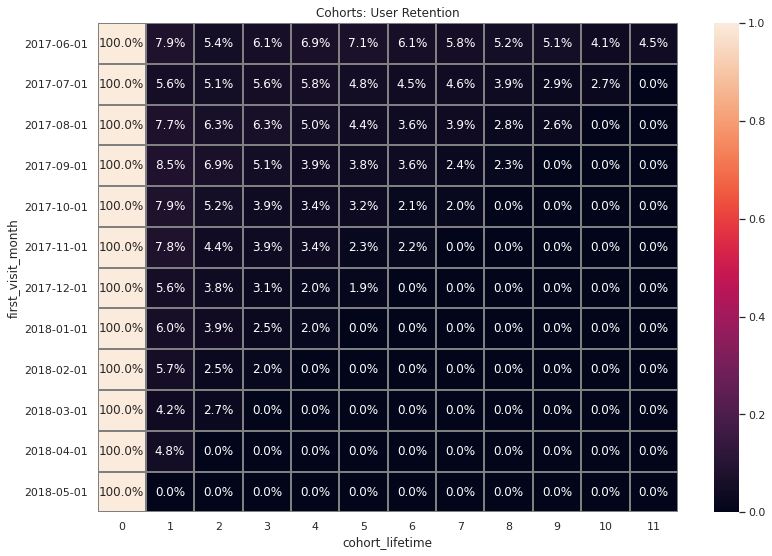

In [134]:
cohorts = (
    visits.groupby(['first_visit_month', 'cohort_lifetime'])
    .agg({'Uid': 'nunique'})
    .reset_index()
) 
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][
    ['first_visit_month', 'Uid']
]

initial_users_count = initial_users_count.rename(
    columns={'Uid': 'cohort_users'}
) 
cohorts = cohorts.merge(initial_users_count, on='first_visit_month') 

cohorts['retention'] = cohorts['Uid'] / cohorts['cohort_users'] 

retention_pivot = cohorts.pivot_table(
    index='first_visit_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
).fillna(0)

import seaborn as sns
from matplotlib import pyplot as plt

retention_pivot.index=retention_pivot.index.astype(str)
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(
    retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray'
)

**Conclusions**   

Retention drops on the 1st month across all cohorts. For some cohorts users come back only on month 2.
For example, for cohorts June 2017, Sept 2017, and Nov 2017 the retention on month 1 is 0%, and the users only came back during the 2nd month. The cohorts of August 2017, October 2017, and January 2018 have the highest retention on month 1 - 7.7%, 7.9%, and 9% respectively. Nevertheless, for cohort January 2018 with retention of 9% on the month 1, the drop is drastic on month 2 - 2,5%. In general, starting from February 2018, for all cohorts onward the retention is around 2%-2.5% on month 2.

### Sales

We will answer the following question:   

1. When do people start buying?
2. How many orders do they make during a given period of time?
3. What is the average purchase size?
4. How much money do they bring? (LTV)

To answer these questions, we will use 'orders' dateset.

#### Conversion

To answer the question when people start buying, we need to find the conversion: we need to find the time difference between the first visit and the first order.

In [55]:
orders = orders.join(first_session_date,on='Uid')
orders.head()

Buy Ts  Revenue                   Uid first_session_date
0 2017-06-01 00:10:00    17.00  10329302124590727494         2017-06-01
1 2017-06-01 00:25:00     0.55  11627257723692907447         2017-06-01
2 2017-06-01 00:27:00     0.37  17903680561304213844         2017-06-01
3 2017-06-01 00:29:00     0.55  16109239769442553005         2017-06-01
4 2017-06-01 07:58:00     0.37  14200605875248379450         2017-06-01

In [56]:
orders['first_session_month'] = orders['first_session_date'].astype('datetime64[M]')

In [57]:
orders['order_date']  = orders['Buy Ts'].dt.date
orders['order_date'] = pd.to_datetime(orders['order_date'])

Let's single out order month for each order to be able to conduct cohort analysis.

In [58]:
orders['order_month'] = orders['order_date'].astype('datetime64[M]')

To find out when each user starts buying, we need to find the first date when an order was placed for each user.

In [59]:
first_order_date = orders.groupby(['Uid'])['order_date'].min()
first_order_date.name = 'first_order_date'
orders = orders.join(first_order_date,on='Uid')
orders.head()

Buy Ts  Revenue                   Uid first_session_date  \
0 2017-06-01 00:10:00    17.00  10329302124590727494         2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447         2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844         2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005         2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450         2017-06-01   

  first_session_month order_date order_month first_order_date  
0          2017-06-01 2017-06-01  2017-06-01       2017-06-01  
1          2017-06-01 2017-06-01  2017-06-01       2017-06-01  
2          2017-06-01 2017-06-01  2017-06-01       2017-06-01  
3          2017-06-01 2017-06-01  2017-06-01       2017-06-01  
4          2017-06-01 2017-06-01  2017-06-01       2017-06-01

To be able to run cohort analysis of conversion cohorts, we need to single out first order month.

In [60]:
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders.head()

Buy Ts  Revenue                   Uid first_session_date  \
0 2017-06-01 00:10:00    17.00  10329302124590727494         2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447         2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844         2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005         2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450         2017-06-01   

  first_session_month order_date order_month first_order_date  \
0          2017-06-01 2017-06-01  2017-06-01       2017-06-01   
1          2017-06-01 2017-06-01  2017-06-01       2017-06-01   
2          2017-06-01 2017-06-01  2017-06-01       2017-06-01   
3          2017-06-01 2017-06-01  2017-06-01       2017-06-01   
4          2017-06-01 2017-06-01  2017-06-01       2017-06-01   

  first_order_month  
0        2017-06-01  
1        2017-06-01  
2        2017-06-01  
3        2017-06-01  
4        2017-06-01

In [61]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Buy Ts               50415 non-null  datetime64[ns]
 1   Revenue              50415 non-null  float64       
 2   Uid                  50415 non-null  uint64        
 3   first_session_date   50415 non-null  datetime64[ns]
 4   first_session_month  50415 non-null  datetime64[ns]
 5   order_date           50415 non-null  datetime64[ns]
 6   order_month          50415 non-null  datetime64[ns]
 7   first_order_date     50415 non-null  datetime64[ns]
 8   first_order_month    50415 non-null  datetime64[ns]
dtypes: datetime64[ns](7), float64(1), uint64(1)
memory usage: 3.5 MB


Conversion depicts how long does it take from first visit to the order in days. So for each user we will find the date of first visit and the date of first order. For that we will create separate datasets with visits and orders, and then will merge them to find the conversion time for each user.

In [62]:
first_orders = orders.groupby(['Uid'])['order_date'].min().reset_index()
first_orders

Uid order_date
0           313578113262317 2018-01-03
1          1575281904278712 2017-06-03
2          2429014661409475 2017-10-11
3          2464366381792757 2018-01-28
4          2551852515556206 2017-11-24
...                     ...        ...
36518  18445147675727495770 2017-11-24
36519  18445407535914413204 2017-09-22
36520  18445601152732270159 2018-03-26
36521  18446156210226471712 2018-02-18
36522  18446167067214817906 2017-10-17

[36523 rows x 2 columns]

In [63]:
first_visits = visits.groupby(['Uid'])['first_session_date'].min().reset_index()
first_visits

Uid first_session_date
0             11863502262781         2018-03-01
1             49537067089222         2018-02-06
2            297729379853735         2017-06-07
3            313578113262317         2017-09-18
4            325320750514679         2017-09-30
...                      ...                ...
228164  18446403737806311543         2017-11-30
228165  18446424184725333426         2017-12-06
228166  18446556406699109058         2018-01-01
228167  18446621818809592527         2017-12-27
228168  18446676030785672386         2017-10-04

[228169 rows x 2 columns]

In [64]:
visits_and_orders = pd.merge(first_visits, first_orders, on='Uid')
visits_and_orders

Uid first_session_date order_date
0           313578113262317         2017-09-18 2018-01-03
1          1575281904278712         2017-06-03 2017-06-03
2          2429014661409475         2017-10-11 2017-10-11
3          2464366381792757         2018-01-27 2018-01-28
4          2551852515556206         2017-11-24 2017-11-24
...                     ...                ...        ...
36518  18445147675727495770         2017-08-20 2017-11-24
36519  18445407535914413204         2017-09-22 2017-09-22
36520  18445601152732270159         2017-08-07 2018-03-26
36521  18446156210226471712         2017-11-07 2018-02-18
36522  18446167067214817906         2017-10-17 2017-10-17

[36523 rows x 3 columns]

In [65]:
visits_and_orders['conversion_time'] =((pd.to_datetime(visits_and_orders['order_date'])-pd.to_datetime(visits_and_orders['first_session_date']))/np.timedelta64(1,'D')).astype('int')
visits_and_orders.head()

Uid first_session_date order_date  conversion_time
0   313578113262317         2017-09-18 2018-01-03              107
1  1575281904278712         2017-06-03 2017-06-03                0
2  2429014661409475         2017-10-11 2017-10-11                0
3  2464366381792757         2018-01-27 2018-01-28                1
4  2551852515556206         2017-11-24 2017-11-24                0

Let's see the simple distribution with describe method.

In [66]:
visits_and_orders['conversion_time'].describe()

count    36523.000000
mean        16.895901
std         47.071200
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: conversion_time, dtype: float64

In [67]:
visits_and_orders['conversion_time'].mean()
print('Everage time', (visits_and_orders['conversion_time'].mean().round(2)), 'days.')

Everage time 16.9 days.


In [68]:
visits_and_orders['conversion_time'].mode()

0    0
dtype: int64

In [69]:
import plotly.express as px
fig = px.histogram(visits_and_orders, x="conversion_time",nbins=50)
fig.show()

In [70]:
print(' The overall conversion rate is {:.1%}'.format(orders['Uid'].nunique()/visits['Uid'].nunique()))

 The overall conversion rate is 16.0%


The conversion rate is 16% - 16% of all visitors have made at least one order. Half of the users who have place at least one order, did that on the same day as their first visit. The vast majority (75%) of users who have placed an order, did that within first 2 days from their first visit. The distribution is skewed to the right, which means that in some cases, it took the users much longer to make their first order.

#### Number of orders per user over time

We will use cohort analysis here as well.  We've defined cohort in retention as first session. Further we will work with **first order** as the cohort, since we are looking for reoccuring orders and not visits. Further on in LTV, CAC and ROMI calculations we will also use only info on buyers, since we care about the returns and costs on buyers.

**Cohort analysis on orders per user**

In [71]:
#Using the month of first purchase we will define which cohort our buyers belongs to
cohort_sizes = orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns=['first_order_month','cohort_size']
cohort_sizes.head()

first_order_month  cohort_size
0        2017-06-01         2023
1        2017-07-01         1923
2        2017-08-01         1370
3        2017-09-01         2581
4        2017-10-01         4340

Let's calculate the number of orders per user for each cohort for each month.

In [72]:
#calculating number of purchases for cohort and month
cohort=orders.groupby(['first_order_month','order_month'])['Revenue'].count().reset_index()
cohort.columns=['first_order_month','order_month','orders']
#merging cohort with cohort size
cohort=cohort.merge(cohort_sizes,on=['first_order_month'])
cohort['age_month'] = ((cohort['order_month'] - cohort['first_order_month']) / np.timedelta64(1,'M')).round()
cohort['orders_per_buyer']=cohort['orders']/cohort['cohort_size']
cohort.head()

first_order_month order_month  orders  cohort_size  age_month  \
0        2017-06-01  2017-06-01    2354         2023        0.0   
1        2017-06-01  2017-07-01     177         2023        1.0   
2        2017-06-01  2017-08-01     174         2023        2.0   
3        2017-06-01  2017-09-01     226         2023        3.0   
4        2017-06-01  2017-10-01     292         2023        4.0   

   orders_per_buyer  
0          1.163618  
1          0.087494  
2          0.086011  
3          0.111715  
4          0.144340

In [73]:
cohort_piv=cohort.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='orders_per_buyer', 
    aggfunc='sum'
).cumsum(axis=1)

cohort_piv.round(2).fillna('')

age_month          0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   \
first_order_month                                                               
2017-06-01         1.16  1.25  1.34  1.45  1.59   1.7  1.84  1.92  2.03   2.1   
2017-07-01         1.14  1.19  1.25  1.31  1.34  1.39  1.42  1.44  1.47  1.49   
2017-08-01         1.12   1.2  1.27  1.33  1.39  1.44  1.47  1.53  1.56   1.6   
2017-09-01         1.14  1.22  1.28  1.35  1.37  1.42  1.46  1.48   1.5         
2017-10-01         1.14  1.22  1.25  1.28  1.31  1.34  1.35  1.38               
2017-11-01         1.18  1.28  1.32  1.37  1.41  1.42  1.45                     
2017-12-01         1.15  1.21  1.26   1.3  1.32  1.34                           
2018-01-01         1.12  1.19  1.24  1.25  1.28                                 
2018-02-01         1.12  1.18  1.21  1.22                                       
2018-03-01         1.17  1.22  1.27                                             
2018-04-01         1.10  1.18                                                   
2018-05-01         1.09                                                         
2018-06-01         1.00                                                         

age_month          10.0  11.0  
first_order_month              
2017-06-01         2.15  2.19  
2017-07-01         1.51        
2017-08-01                     
2017-09-01                     
2017-10-01                     
2017-11-01                     
2017-12-01                     
2018-01-01                     
2018-02-01                     
2018-03-01                     
2018-04-01                     
2018-05-01                     
2018-06-01

It looks like the number of orders per user per months has increased steadily and significantly for cohort June 2017 (from 1.2 orders to 2.2 orders). For the rest of the cohorts, there's been an increase, however, not as significant.

#### Average order size

Let's see how much on average users spend per order.

In [74]:
everage_order = orders['Revenue'].mean().round(2)
print('Average user spends', everage_order, 'on one order.')

Average user spends 5.0 on one order.


##### Average order size per user

In [75]:
avg_order=orders.groupby(['Uid'])['Revenue'].sum().reset_index()
avg_order

Uid  Revenue
0           313578113262317     0.55
1          1575281904278712     3.05
2          2429014661409475    73.33
3          2464366381792757     2.44
4          2551852515556206    10.99
...                     ...      ...
36518  18445147675727495770     3.05
36519  18445407535914413204     0.88
36520  18445601152732270159     4.22
36521  18446156210226471712     9.78
36522  18446167067214817906     7.94

[36523 rows x 2 columns]

In [76]:
avg_order['Revenue'].describe()

count    36523.000000
mean         6.901328
std         88.128535
min          0.000000
25%          1.470000
50%          3.050000
75%          5.800000
max      11810.180000
Name: Revenue, dtype: float64

Text(0.5, 0, 'Average Revenue')

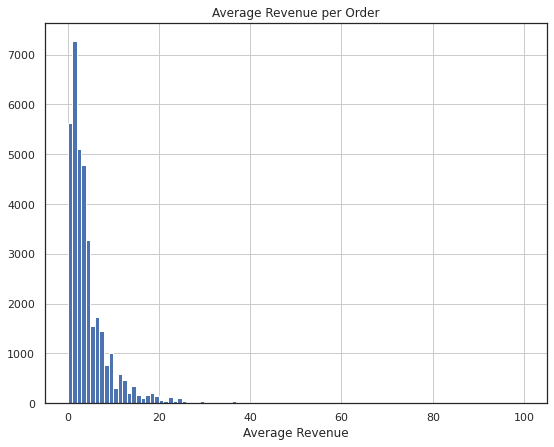

In [77]:
avg_order['Revenue'].hist(bins=100, figsize=(9,7), range=(0,100))
plt.title('Average Revenue per Order')
plt.xlabel('Average Revenue')

Let's also calculate average revenue per user by month:

In [78]:
avg_revenue_by_month = orders.groupby(['order_month'])['Revenue'].mean().reset_index()
avg_revenue_by_month

order_month   Revenue
0   2017-06-01  4.060106
1   2017-07-01  5.306589
2   2017-08-01  4.847139
3   2017-09-01  5.416448
4   2017-10-01  4.928280
5   2017-11-01  4.783518
6   2017-12-01  5.852139
7   2018-01-01  4.112927
8   2018-02-01  4.840095
9   2018-03-01  5.413930
10  2018-04-01  5.150645
11  2018-05-01  4.771279
12  2018-06-01  3.420000

In [79]:
import plotly.express as px
fig = px.line(avg_revenue_by_month, x="order_month", y="Revenue", title="Average revenue per user by month")
fig.show()

##### Total revenue by month

In [80]:
total_revenue_by_month = orders.groupby(['order_month'])['Revenue'].sum().reset_index()
total_revenue_by_month

order_month   Revenue
0   2017-06-01   9557.49
1   2017-07-01  12539.47
2   2017-08-01   8758.78
3   2017-09-01  18345.51
4   2017-10-01  27987.70
5   2017-11-01  27069.93
6   2017-12-01  36388.60
7   2018-01-01  19417.13
8   2018-02-01  25560.54
9   2018-03-01  28834.59
10  2018-04-01  16858.06
11  2018-05-01  20735.98
12  2018-06-01      3.42

In [81]:
import plotly.express as px
fig = px.line(total_revenue_by_month, x="order_month", y="Revenue", title="Total revenue by month")
fig.show()

On average users spend 5 per order. 75% of users have made purchases for 5.80 or under per order. The distribution is skewed to the right, which means that some users spend significantly more.
In December 2017, average revenue per user was the highest, as well as the total revenue. In January 2018, the average revenue per user was the lowest, as well as the total revenue.

**Cohort analysis on averge order:**

In [82]:
avg_order_cohorts=orders.groupby(['first_order_month','order_month'])['Revenue'].mean().reset_index()
avg_order_cohorts['age_month'] = ((avg_order_cohorts['order_month'] - avg_order_cohorts['first_order_month']) / np.timedelta64(1,'M')).round()
avg_order_cohorts.head()

first_order_month order_month   Revenue  age_month
0        2017-06-01  2017-06-01  4.060106        0.0
1        2017-06-01  2017-07-01  5.547006        1.0
2        2017-06-01  2017-08-01  5.088161        2.0
3        2017-06-01  2017-09-01  8.545575        3.0
4        2017-06-01  2017-10-01  7.084178        4.0

In [83]:
avg_order_cohorts_piv=avg_order_cohorts.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='Revenue', 
    aggfunc='mean'
)

avg_order_cohorts_piv.round(2).fillna('')

age_month          0.0    1.0    2.0    3.0    4.0    5.0    6.0    7.0   \
first_order_month                                                          
2017-06-01         4.06   5.55   5.09   8.55   7.08   6.83   6.97   6.76   
2017-07-01         5.29   6.45   9.99   6.64   4.72   3.66   3.79   5.45   
2017-08-01         4.72   5.99   6.28   6.62   7.96   6.27   5.89   7.11   
2017-09-01         4.97  13.17   8.35  62.57  15.43  15.32  16.77  11.21   
2017-10-01         4.37   7.41   5.13   5.59    5.1   5.07   4.28   4.01   
2017-11-01         4.37    4.1   4.47   6.28   4.44   3.73    4.6          
2017-12-01         4.11   4.23  20.07  26.08  15.95  14.11                 
2018-01-01         3.69   4.44   6.45   7.52   2.71                        
2018-02-01         3.71   4.58   3.45   3.87                               
2018-03-01         4.14   5.97   6.33                                      
2018-04-01         4.25    6.2                                             
2018-05-01         4.29                                                    
2018-06-01         3.42                                                    

age_month          8.0    9.0    10.0  11.0  
first_order_month                            
2017-06-01         5.28   8.01  12.04  6.04  
2017-07-01         5.35  11.79   5.65        
2017-08-01          8.7    5.6               
2017-09-01         7.79                      
2017-10-01                                   
2017-11-01                                   
2017-12-01                                   
2018-01-01                                   
2018-02-01                                   
2018-03-01                                   
2018-04-01                                   
2018-05-01                                   
2018-06-01

Average spendings per order has grown from month to month in June 2017 cohort. For cohorts Sept-2017 and Dec-2017 the growth  from month to month is not linear, during some months the the spendings are significatly larger than the avreage order size. For example, for cohort of Sept-2017 on months 3 an average order was 63. And for cohort Dec-2017 in the same lifetime month it was 26.

**Average cohort revenue**

Let's calculate average revenue by cohort, and visualize it.

In [84]:
cohort_revenue = orders.groupby('first_order_month')['Revenue'].sum().reset_index()
cohort_revenue

first_order_month   Revenue
0         2017-06-01  24031.69
1         2017-07-01  16127.92
2         2017-08-01  11606.26
3         2017-09-01  34676.32
4         2017-10-01  27603.45
5         2017-11-01  26098.99
6         2017-12-01  33485.74
7         2018-01-01  16663.13
8         2018-02-01  16750.50
9         2018-03-01  19273.41
10        2018-04-01  11810.61
11        2018-05-01  13925.76
12        2018-06-01      3.42

In [85]:
print('Average revenue per cohort is', cohort_revenue['Revenue'].mean().round())

Average revenue per cohort is 19389.0


Text(0.5, 0, 'Cohorts')

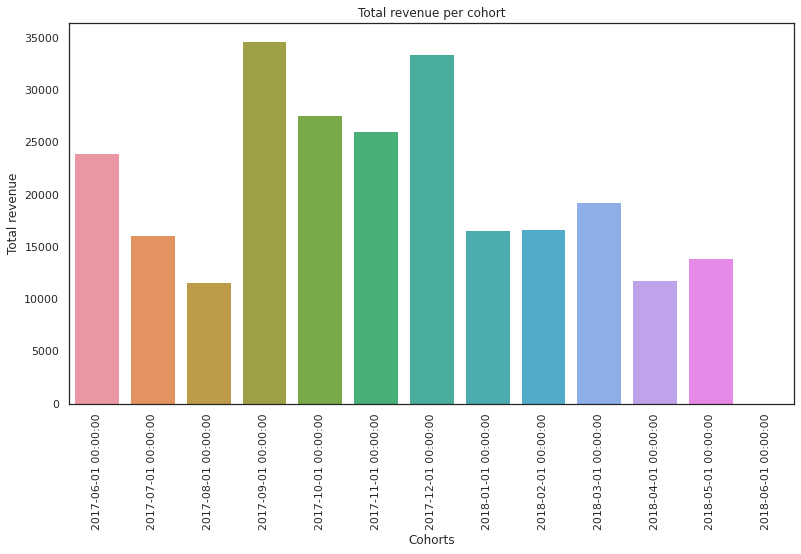

In [86]:
plt.figure(figsize=(13,7))
ax = sns.barplot(data=cohort_revenue, x="first_order_month", y="Revenue")
ax.set_xticklabels(cohort_revenue.first_order_month,rotation=90)
plt.title('Total revenue per cohort')
plt.ylabel('Total revenue')
plt.xlabel('Cohorts')

Average revenue per cohort is 19,389.0. Cohorts of Sept-2017 and December-2017 brought in the biggest total revenue - about 35,000, which is obvious, because those cohorts had the largest average orders. August cohort brought in the lowest total revenue.

#### LTV

How much money do buyers bring overall throughout their lifetime? 

**Cohort analysis on lifetime value:**

For the calculations we will assume margin rate as 1, and, therefore, gross profit=revenue.   

Let's calculate average LTV per user for each month for each cohort.

In [87]:
#Let's first get the revenue per cohort in each month
ltv_cohort=orders.groupby(['first_order_month','order_month'])['Revenue'].sum().reset_index()
ltv_cohort.columns = ['first_order_month','month','revenue']
#merge with the cohort size
ltv_cohort=ltv_cohort.merge(cohort_sizes,on=['first_order_month'])
ltv_cohort['age']=((ltv_cohort['month'] - ltv_cohort['first_order_month']) / np.timedelta64(1,'M')).round()
ltv_cohort['ltv']=ltv_cohort['revenue']/ltv_cohort['cohort_size']
ltv_cohort

first_order_month      month   revenue  cohort_size  age       ltv
0         2017-06-01 2017-06-01   9557.49         2023  0.0  4.724414
1         2017-06-01 2017-07-01    981.82         2023  1.0  0.485329
2         2017-06-01 2017-08-01    885.34         2023  2.0  0.437637
3         2017-06-01 2017-09-01   1931.30         2023  3.0  0.954671
4         2017-06-01 2017-10-01   2068.58         2023  4.0  1.022531
..               ...        ...       ...          ...  ...       ...
74        2018-03-01 2018-05-01   1114.87         3533  2.0  0.315559
75        2018-04-01 2018-04-01  10600.69         2276  0.0  4.657597
76        2018-04-01 2018-05-01   1209.92         2276  1.0  0.531599
77        2018-05-01 2018-05-01  13925.76         2988  0.0  4.660562
78        2018-06-01 2018-06-01      3.42            1  0.0  3.420000

[79 rows x 6 columns]

In [88]:
ltv_cohort_piv=ltv_cohort.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='sum'
).cumsum(axis=1)

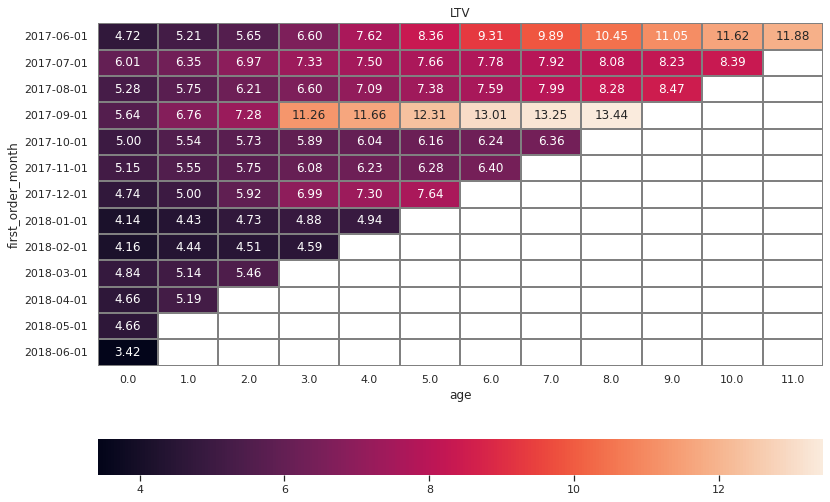

In [89]:
ltv_cohort_piv.index=ltv_cohort_piv.index.astype(str)
plt.figure(figsize=(13,9))
sns.heatmap(ltv_cohort_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='LTV')
plt.show()

**Conclusions:**   

-	The conversion rate is 16%. 
-	Half of the users who have place at least one order, did that on the same day as their first visit. 75% of users did that within first 2 days from their first visit. 
-	The number of orders per user per month has increased steadily and significantly for cohort June 2017. For the rest of the cohorts, there's been an increase, however, not as significant.
-	On average users spend 5 per order. 
-	Average spendings per order has grown from month to month in June 2017 cohort. For cohorts Sept-2017 and Dec-2017 the growth from month to month is not linear, during some months the spendings are significantly larger than the average order size.
-	Average revenue per cohort is 19,389. Cohorts of Sept-2017 and December-2017 brought in the biggest total revenue - about 35,000, which is obvious, because those cohorts had the largest average orders. August cohort brought in the lowest total revenue.
-	June-2017 and Sept-2017 cohorts have the highest cumulative LTV after 6 months - 9.31 and 13.01 respectively.


### Marketing

#### Marketing costs

Let's group costs by date and source and visualize it.

##### Total marketing costs

In [90]:
costs['costs'].sum()
print('Total marketing cost is {}'.format(costs['costs'].sum()))

Total marketing cost is 329131.62


In [91]:
costs['month'] = costs['dt'].astype('datetime64[M]')

In [92]:
marketing_costs=costs.sort_values(by=['month','source_id'])
marketing_costs.head()

source_id         dt  costs      month
0          1 2017-06-01  75.20 2017-06-01
1          1 2017-06-02  62.25 2017-06-01
2          1 2017-06-03  36.53 2017-06-01
3          1 2017-06-04  55.00 2017-06-01
4          1 2017-06-05  57.08 2017-06-01

In [93]:
marketing_pivot=marketing_costs.pivot_table(index='source_id', columns='month', values='costs', aggfunc='sum')
marketing_pivot

month      2017-06-01  2017-07-01  2017-08-01  2017-09-01  2017-10-01  \
source_id                                                               
1             1125.61     1072.88      951.81     1502.01     2315.75   
2             2427.38     2333.11     1811.05     2985.66     4845.00   
3             7731.65     7674.37     6143.54     9963.55    15737.24   
4             3514.80     3529.73     3217.36     5192.26     6420.84   
5             2616.12     2998.14     2185.28     3849.14     5767.40   
9              285.22      302.54      248.93      415.62      609.41   
10             314.22      329.82      232.57      460.67      627.24   

month      2017-11-01  2017-12-01  2018-01-01  2018-02-01  2018-03-01  \
source_id                                                               
1             2445.16     2341.20     2186.18     2204.48     1893.09   
2             5247.68     4897.80     4157.74     4474.34     3943.14   
3            17025.34    16219.52    14808.78    14228.56    13080.85   
4             5388.82     7680.47     5832.79     5711.96     5961.87   
5             6325.34     5872.52     5371.52     5071.31     4529.62   
9              683.18      657.98      547.16      551.50      480.29   
10             792.36      645.86      614.35      480.88      526.41   

month      2018-04-01  2018-05-01  
source_id                          
1             1327.49     1467.61  
2             2993.70     2689.44  
3             9296.81     9411.42  
4             4408.49     4214.21  
5             3501.15     3669.56  
9              373.49      362.17  
10             388.25      409.86

##### Marketing costs by source

In [94]:
costs_by_source = costs.groupby(['source_id'])['costs'].sum().reset_index()
costs_by_source

source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49

In [95]:
print('Average marketing costs per source is', costs_by_source['costs'].mean().round(2))

Average marketing costs per source is 47018.8


Text(0.5, 0, 'Source')

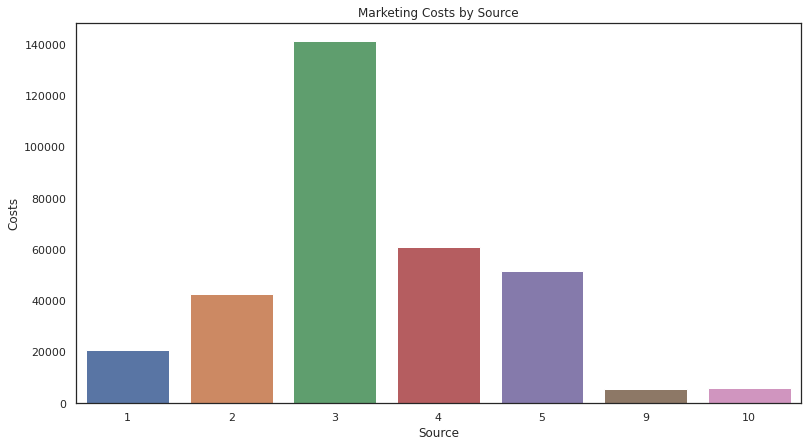

In [96]:
plt.figure(figsize=(13,7))
ax = sns.barplot(data=costs_by_source, x="source_id", y="costs")
ax.set_xticklabels(costs_by_source.source_id)
plt.title('Marketing Costs by Source')
plt.ylabel('Costs')
plt.xlabel('Source')

Average marketing costs per source - 47,018.8 It looks like the largest marketing budget spendings (about 140,000) where on users who came from source 3, and then from source 4.

##### Marketing costs by month

In [97]:
costs_by_month = costs.groupby(['month'])['costs'].sum().reset_index()
costs_by_month

month     costs
0  2017-06-01  18015.00
1  2017-07-01  18240.59
2  2017-08-01  14790.54
3  2017-09-01  24368.91
4  2017-10-01  36322.88
5  2017-11-01  37907.88
6  2017-12-01  38315.35
7  2018-01-01  33518.52
8  2018-02-01  32723.03
9  2018-03-01  30415.27
10 2018-04-01  22289.38
11 2018-05-01  22224.27

In [98]:
print('Average marketing costs per month', costs_by_month['costs'].mean().round(2))

Average marketing costs per month 27427.63


Text(0.5, 0, 'Month')

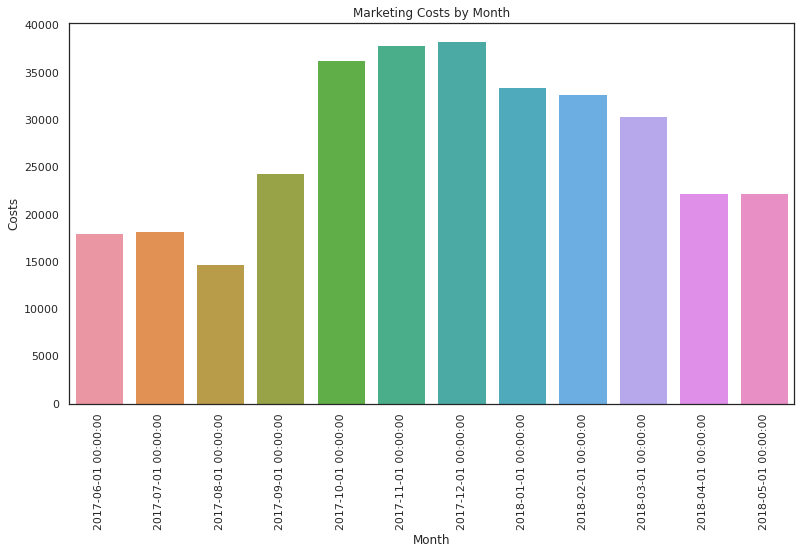

In [99]:
plt.figure(figsize=(13,7))
ax = sns.barplot(data=costs_by_month, x="month", y="costs")
ax.set_xticklabels(costs_by_month.month, rotation=90)
plt.title('Marketing Costs by Month')
plt.ylabel('Costs')
plt.xlabel('Month')

Average marketing costs per month are 27,427.63. In August 2017 marketing costs were the lowest - less than 15,000. On October, November, and December the marketing team spent the largest amounts - over 35,000 each month. Here we remember that December-2017 cohort brought in the biggest total revenue - about 35,000, and for Sept-2017 cohort on months 3 (which is December) an average order was 63; for cohort Dec-2017 the average order size was high as well. Additionally, we remember that there was a spike in DAU, WAU, MAU around that time - specifically, on the last week of November 2017. Bigger number of users during December brought in more revenue. It seem that marketing efforts are paying off. Let's continue researching to see if this is the case.

In [100]:
import plotly.express as px
fig = px.line(marketing_costs, x="dt", y="costs", color='source_id', title="Marketing costs by source over time")
fig.show()

##### Marketing costs by source by month

In [101]:
costs_by_month_source=costs.groupby(['month','source_id'])['costs'].sum().reset_index()
costs_by_month_source.head()

month  source_id    costs
0 2017-06-01          1  1125.61
1 2017-06-01          2  2427.38
2 2017-06-01          3  7731.65
3 2017-06-01          4  3514.80
4 2017-06-01          5  2616.12

In [102]:
fig = px.line(costs_by_month_source, x="month", y="costs", color='source_id', title='Costs by source by month')
fig.show()

The marketing costs for source 3 were the highest, especially between October through March, and the pick was in December 2017. The costs for sources 9 and 10 were the lowest. Source 4 also has higher costs, comparing to othe sources during Sept-March.

**Preliminary conclusions**

-	Total marketing cost is 329,131.62.  
-   Average marketing costs per month 27,427.63
-	Average marketing costs per source is 47,018.8.
-	Largest marketing budget spendings (about 140,000) where on users who came from source 3, and then from source 4.  
-	The marketing costs for source 3 were the highest, especially between October through March, and the pick was in December 2017. The costs for sources 9 and 10 were the lowest. Source 4 also has higher costs, compared to other sources during Sept-March.
-	In August 2017 marketing costs were the lowest - less than 15,000. 
-	In October, November, and December the marketing team spent the largest amounts - over 35,000 each month. 
-	Reminder: December-2017 cohort brought in the biggest total revenue - about 35,000, and for Sept-2017 cohort on months 3 (which is December) an average order was 63; for cohort Dec-2017 the average order size was high as well. Additionally, we remember that there was a spike in DAU, WAU, MAU around that time - specifically, on the last week of November 2017. Bigger number of users during December brought in more revenue. 
- Total monthly costs were the highest for source 3, with November 2017 being the most extpensive month.
- The lowest costs were for sources 9 and 10.

#### CAC

##### Customer acquisition cost per month

Let's calculate customer acquisition cost. For that will will calculate the number of buyers per cohort.

In [103]:
buyers_per_month=orders.groupby(['first_order_month'])['Uid'].nunique().reset_index()
buyers_per_month.columns=['month','buyers']
buyers_per_month.head()

month  buyers
0 2017-06-01    2023
1 2017-07-01    1923
2 2017-08-01    1370
3 2017-09-01    2581
4 2017-10-01    4340

Text(0.5, 0, 'Month')

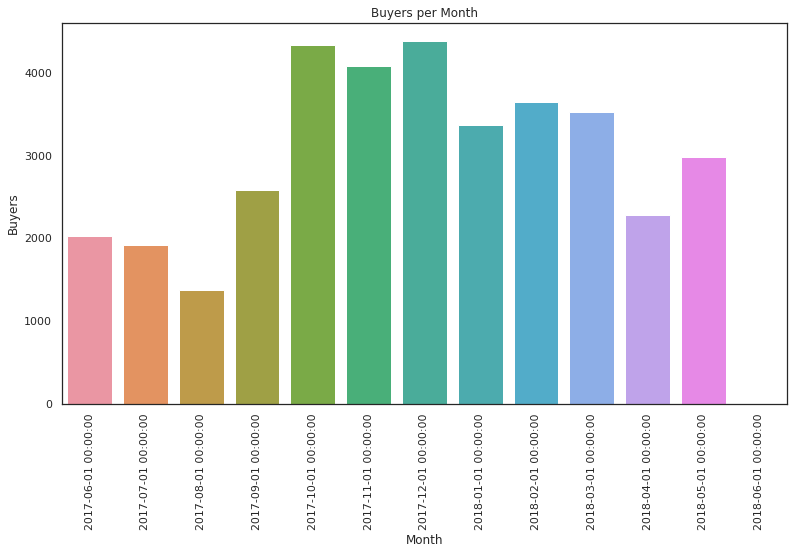

In [104]:
plt.figure(figsize=(13,7))
ax = sns.barplot(data=buyers_per_month, x="month", y="buyers")
ax.set_xticklabels(buyers_per_month.month, rotation=90)
plt.title('Buyers per Month')
plt.ylabel('Buyers')
plt.xlabel('Month')

October, November, and December 2017 had the highest numbers of buyers as well - over 4,000 each. August 2017 had the lowest number of buyers.

Let's calculate average CAC per month and visualize it.

In [105]:
CAC_per_month=costs_by_month.merge(buyers_per_month,how='left',on=['month'])
CAC_per_month['CAC']=CAC_per_month['costs']/CAC_per_month['buyers']
CAC_per_month.head()

month     costs  buyers        CAC
0 2017-06-01  18015.00    2023   8.905091
1 2017-07-01  18240.59    1923   9.485486
2 2017-08-01  14790.54    1370  10.796015
3 2017-09-01  24368.91    2581   9.441654
4 2017-10-01  36322.88    4340   8.369327

In [106]:
fig = px.line(CAC_per_month, x="month", y="CAC", title='CAC per month')
fig.show()

It looks like, despite the relatively small amount of money invested in marketing in August 2017, it had the highest customer aquisition cost. This is because the number of buyers was also lowest during that month. Maybe marketing team should have invested a little more into marketing in August.

##### Customer acqusition cost per source

In [107]:
visits.groupby(['Uid'])['Source Id'].nunique().head()

Uid
11863502262781     1
49537067089222     1
297729379853735    1
313578113262317    1
325320750514679    1
Name: Source Id, dtype: int64

Let's find the source users came from for the first time.

In [108]:
first_source=visits.sort_values('session_date').groupby('Uid').first()['Source Id'].reset_index()
first_source.columns=['Uid','first_source']
first_source.head()

Uid  first_source
0   11863502262781             3
1   49537067089222             2
2  297729379853735             3
3  313578113262317             2
4  325320750514679             5

In [109]:
orders=orders.merge(first_source,on=['Uid'],how='left')
orders.head()

Buy Ts  Revenue                   Uid first_session_date  \
0 2017-06-01 00:10:00    17.00  10329302124590727494         2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447         2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844         2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005         2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450         2017-06-01   

  first_session_month order_date order_month first_order_date  \
0          2017-06-01 2017-06-01  2017-06-01       2017-06-01   
1          2017-06-01 2017-06-01  2017-06-01       2017-06-01   
2          2017-06-01 2017-06-01  2017-06-01       2017-06-01   
3          2017-06-01 2017-06-01  2017-06-01       2017-06-01   
4          2017-06-01 2017-06-01  2017-06-01       2017-06-01   

  first_order_month  first_source  
0        2017-06-01             1  
1        2017-06-01             2  
2        2017-06-01             2  
3        2017-06-01             2  
4        2017-06-01             3

Let's find number of buyers for each source by month.

In [110]:
buyers_per_month_source=orders.groupby(['first_order_month','first_source'])['Uid'].nunique().reset_index()
buyers_per_month_source.columns=['month','source_id','buyers']
buyers_per_month_source.head()

month  source_id  buyers
0 2017-06-01          1     213
1 2017-06-01          2     241
2 2017-06-01          3     616
3 2017-06-01          4     405
4 2017-06-01          5     389

Let's now calculate actual average customer acquisition cost for one buyer by source by month.

In [111]:
CAC_per_month_source=costs_by_month_source.merge(buyers_per_month_source,how='left',on=['month','source_id'])
CAC_per_month_source['CAC']=CAC_per_month_source['costs']/CAC_per_month_source['buyers']
CAC_per_month_source.head()

month  source_id    costs  buyers        CAC
0 2017-06-01          1  1125.61     213   5.284554
1 2017-06-01          2  2427.38     241  10.072116
2 2017-06-01          3  7731.65     616  12.551380
3 2017-06-01          4  3514.80     405   8.678519
4 2017-06-01          5  2616.12     389   6.725244

In [112]:
fig = px.line(CAC_per_month_source, x="month", y="CAC",color='source_id',title='CAC by source per user over time')
fig.show()

Users who came from sources 2 and 3 were the most expensive, especially in August for source 3. August and February were expensive for source 2. For source 4 the users were the cheapest in November.

Let's also calculate overall average CAC per source.

In [113]:
average_CAC_per_source = CAC_per_month_source.groupby(['source_id'])['CAC'].mean().reset_index()
average_CAC_per_source

source_id        CAC
0          1   6.228497
1          2  12.310401
2          3  14.255045
3          4   6.631797
4          5   7.251147
5          9   5.604490
6         10   4.951045

**Preliminary conclusions**   

- October, November, and December 2017 had the highest numbers of buyers - over 4,000 each. August 2017 had the lowest number of buyers.   
- Despite the relatively small amount of money invested in marketing in August 2017, it had the highest customer aquisition cost. This is because the number of buyers was also lowest during that month.   
- Users who came from sources 2 and 3 were the most expensive, especially in August for source 3. August and February were expensive for source 2. For source 4 the users were the cheapest in November.


#### ROI

Let's now calculate return on investment.

##### Cohort analysis on ROI

 **ROI=LTV/CAC**

We will merge calculations on CAC per month and info on LTV in ltv_cohort.

In [114]:
CAC_per_month_ROI=CAC_per_month[['month','CAC']]
CAC_per_month_ROI.columns=['first_order_month','CAC']
ROI=ltv_cohort.merge(CAC_per_month_ROI,on=['first_order_month'],how='left')
ROI.head()

first_order_month      month  revenue  cohort_size  age       ltv       CAC
0        2017-06-01 2017-06-01  9557.49         2023  0.0  4.724414  8.905091
1        2017-06-01 2017-07-01   981.82         2023  1.0  0.485329  8.905091
2        2017-06-01 2017-08-01   885.34         2023  2.0  0.437637  8.905091
3        2017-06-01 2017-09-01  1931.30         2023  3.0  0.954671  8.905091
4        2017-06-01 2017-10-01  2068.58         2023  4.0  1.022531  8.905091

In [115]:
ROI['ROI']=ROI['ltv']/ROI['CAC']
roi_piv = ROI.pivot_table(
    index='first_order_month', columns='age', values='ROI', aggfunc='mean'
).cumsum(axis=1).round(2) 

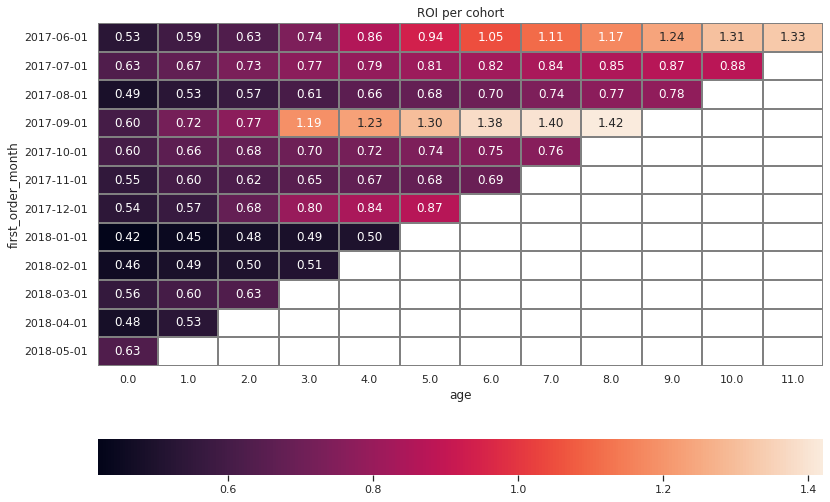

In [116]:
roi_piv.index=roi_piv.index.astype(str)
plt.figure(figsize=(13,9))
sns.heatmap(roi_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='ROI per cohort')
plt.show()

As we see, only for two cohorts (June 2017 and September 2017) the return on investment exceeds after 3-6 months. As for the rest of the cohorts, the costs are higher than the revenue the users in cohorts bring. We also see that in general the cohorts behave the same in terms of ROI, because costs are unified and the revenue (LTV) doesn't vary from cohort to cohort.

##### Return on marketing investment

**Cohort analysis on ROI by source**

In [117]:
ltv_per_source=orders.groupby(['first_source'])['Uid','Revenue'].agg({'Uid':'nunique','Revenue':'sum'}).reset_index()
ltv_per_source.columns=['source_id','buyers','revenue']
ltv_per_source['ltv']=ltv_per_source['revenue']/ltv_per_source['buyers']
ltv_per_source

source_id  buyers   revenue        ltv
0          1    3365  34797.27  10.340942
1          2    3556  45335.95  12.749142
2          3   10137  51958.06   5.125585
3          4    9999  55387.40   5.539294
4          5    7109  54442.14   7.658199
5          7       1      1.22   1.220000
6          9    1054   5538.50   5.254744
7         10    1302   4596.66   3.530461

In [118]:
roi_per_source=costs_by_source.merge(ltv_per_source,on=['source_id'])
roi_per_source['cac']=roi_per_source['costs']/roi_per_source['buyers']
roi_per_source['romi']=roi_per_source['ltv']/roi_per_source['cac']
roi_per_source

source_id      costs  buyers   revenue        ltv        cac      romi
0          1   20833.27    3365  34797.27  10.340942   6.191165  1.670274
1          2   42806.04    3556  45335.95  12.749142  12.037694  1.059102
2          3  141321.63   10137  51958.06   5.125585  13.941169  0.367658
3          4   61073.60    9999  55387.40   5.539294   6.107971  0.906896
4          5   51757.10    7109  54442.14   7.658199   7.280504  1.051878
5          9    5517.49    1054   5538.50   5.254744   5.234810  1.003808
6         10    5822.49    1302   4596.66   3.530461   4.471959  0.789466

**Let's take a full advantage of the table above and visualize all of the metrics by source:** 

- marketing costs  
- number of buyers  
- total revenue  
- lifetime value   
- customer acquisition cost  
- return on marketing investment

Calculations for some of these metrics we've seem above, however, we will now see the concentrated analysis.

In [119]:
fig = px.bar(roi_per_source, x='source_id', y='romi', color='source_id',title='Return on marketing investments per source')
fig.update_xaxes(type='category')
fig.show()

We can see that only for source 1 there's a significant revenue and return on investment. For sources 3,4, 10 there's no return on investment. The rest of the sources break even.

In [120]:
fig = px.bar(roi_per_source, x='source_id', y='revenue', color='source_id',title='Revenue per source')
fig.update_xaxes(type='category')
fig.show()

Revenue for source 4 is the highest, with sources 3 and 5 just a little behind - all of them over 50K each. Sources 1 and 2 are a little behind in terms of the revenue - roughly between 35K and 45K. Sources 9 and 10 bring in very little revenue - less then 10K.

In [121]:
fig = px.bar(roi_per_source, x='source_id', y='buyers', color='source_id',title='Buyers per source')
fig.update_xaxes(type='category')
fig.show()

The largest number of buyers come from sources 3 and 4. And the lowest are from sources 9 and 10. Sources 1 and 2 a in the middles.

In [122]:
fig = px.bar(roi_per_source, x='source_id', y='costs', color='source_id',title='Marketing costs per source')
fig.update_xaxes(type='category')
fig.show()

The costs for source 3 is the highest - 0ver 140,000. The costs for sources 4 and 5 are in the middle - 55,000-60,000, with source 2 just a little behind with about 40,000 of total marketing costs. Costs for sources 1, 9, 10 are the lowest.

In [123]:
fig = px.bar(roi_per_source, x='source_id', y='cac', color='source_id',title='CAC per source')
fig.update_xaxes(type='category')
fig.show()

CAC for source 3 is the highest, and costs for source 2 are just behind. Sources 1, 4, and 5 are in the middle, just a little above sources 9 and 10.

In [124]:
fig = px.bar(roi_per_source, x='source_id', y='ltv', color='source_id',title='Lifetime value per source')
fig.update_xaxes(type='category')
fig.show()

The LTV for sources 1 and 2 are the highest, with users from souce 2 bringing the most revenue throughout their lifetime. Sources 3,4,5, and 9 bring in about the same amount. And 10 is the lowest.

##### Metrics per device

Let's find out which devices customers user for purchases, and how much revenue they bring.

In [125]:
devices=visits.sort_values('session_date').groupby('Uid').first()['Device'].reset_index()
devices.columns=['Uid','device']
devices.head()

Uid   device
0   11863502262781    touch
1   49537067089222    touch
2  297729379853735  desktop
3  313578113262317  desktop
4  325320750514679  desktop

In [126]:
orders=orders.merge(devices,on=['Uid'],how='left')
orders.head()

Buy Ts  Revenue                   Uid first_session_date  \
0 2017-06-01 00:10:00    17.00  10329302124590727494         2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447         2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844         2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005         2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450         2017-06-01   

  first_session_month order_date order_month first_order_date  \
0          2017-06-01 2017-06-01  2017-06-01       2017-06-01   
1          2017-06-01 2017-06-01  2017-06-01       2017-06-01   
2          2017-06-01 2017-06-01  2017-06-01       2017-06-01   
3          2017-06-01 2017-06-01  2017-06-01       2017-06-01   
4          2017-06-01 2017-06-01  2017-06-01       2017-06-01   

  first_order_month  first_source   device  
0        2017-06-01             1  desktop  
1        2017-06-01             2  desktop  
2        2017-06-01             2  desktop  
3        2017-06-01             2  desktop  
4        2017-06-01             3  desktop

In [127]:
ltv_per_device=orders.groupby(['device'])['Uid','Revenue'].agg({'Uid':'nunique','Revenue':'sum'}).reset_index()
ltv_per_device.columns=['device','buyers','revenue']
ltv_per_device['ltv']=ltv_per_device['revenue']/ltv_per_device['buyers']
ltv_per_device

device  buyers   revenue       ltv
0  desktop   29274  211691.2  7.231373
1    touch    7249   40366.0  5.568492

In [128]:
fig = px.bar(ltv_per_device, x='device', y='ltv', color='device',title='Lifetime value per device')
fig.update_xaxes(type='category')
fig.show()

fig = px.bar(ltv_per_device, x='device', y='revenue', color='device',title='Revenue per device')
fig.update_xaxes(type='category')
fig.show()

fig = px.bar(ltv_per_device, x='device', y='buyers', color='device',title='Buyers per device')
fig.update_xaxes(type='category')
fig.show()

Devices analysis above shows that most buyers use desktop - a little under 30K, as oppsed to mobile - about 7K. It's only logical that desktop users bring ing more revenue: over 200K, as opposed to about 40K from mobile users. Lifetime value is also higher for desktop users.

**Conclusions**  

- Only for two cohorts (June 2017 and September 2017) the return on investment exceeds after 3-6 months. As for the rest of the cohorts, the costs are higher than the revenue the users in cohorts bring.   
- Only for source 1 there's a significant revenue and return on investment. For sources 3,4, 10 there's no return on investment. The rest of the sources break even.  
- Revenue for source 4 is the highest, with sources 3 and 5 just a little behind - all of them over 50K each. Sources 1 and 2 are a little behind in terms of the revenue - roughly between 35K and 45K. Sources 9 and 10 bring in very little revenue - less then 10K.  
- The largest number of buyers come from sources 3 and 4. And the lowest are from sources 9 and 10. Sources 1 and 2 a in the middles.  
- The costs for source 3 is the highest - 0ver 140,000. The costs for sources 4 and 5 are in the middle - 55,000-60,000, with source 2 just a little behind with about 40,000 of total marketing costs. Costs for sources 1, 9, 10 are the lowest.   
- CAC for source 3 is the highest, and costs for source 2 are just behind. Sources 1, 4, and 5 are in the middle, just a little above sources 9 and 10.  
- The LTV for sources 1 and 2 are the highest, with users from souce 2 bringing the most revenue throughout their lifetime. Sources 3,4,5, and 9 bring in about the same amount. And 10 is the lowest.
- Analysis by devices shows that most buyers use desktop - a little under 30K, as oppsed to mobile - about 7K. It's only logical that desktop users bring ing more revenue: over 200K, as opposed to about 40K from mobile users. Lifetime value is also higher for desktop users.

## General Conclusions

**1. Product**

   ***User Behaviour***  

- DAU - There are little over 900 daily active users at the Yandex.Afisha platform. DAU numbers had a steady growth starting from September through Nov 2017 and then spiked dramatically to over 3,000 around the end of November 2017, as which point it had a slight decrease through December 2017 - March 2018. The DAU dropped around April 2018. August 2017 also has quite low number of DAU, comparing to other months. It seems that September to March were the most active months.   

- WAU - There are little over 5,700 weekly active users at the Yandex.Afisha platform. Number of WAU had a steady growth from mid-August through Nov 2017 with a spike on the week of Nov-23 spiked to 10,000, as which point it had a slight decrease through January-March 2018. The WAU dropped on the week of Mar-29, 2018. The weeks in the beginning of August 2017 and end of May 2018 have the lowest number of active users - around 2000.   

- MAU - There are over 23,000 monthly active users at the Yandex.Afisha platform. August 2017 had the lowest number of active users, and the number of MAU had a steady growth through Sept - Nov 2017, whith November being the most active month with around 30,000 users, as which point it had a slight and steady decrease through January-April 2018. The MAU dropped around April 2018. It seems that October to March were the most active months. Maybe, it's a seasonal activity during colder months.   

- Daily Sessions
There's a similar dynamics as for the daily users, with an average of over 900 sessions and a spike around the end of November 2017 to over 4,000 daily sessions. There's the same drop in the daily sessions around April 2018, just as for the users, which is logical: the number of DAU dropped, and so is the number of daily sessions.  

- Sessions per user per day
The average number of sessions is a little over 1 session. This means that average user visits the platform about once a day, some users visit the platform more than once.  

Despite the optical spike in user daily sessions around the end of December, the difference is insignificant between 1.10 and 1.20 daily sessions per user. And even at the least active period - April 2018, an average user visited the platform once a day.
The number of daily sessions and the DAU are almost the same, the graphs' trends are almost identical for these two metrics. This means that there was on average one session per user per day.  

25% of the users have sessions 120 second or under. 120 seconds is 2 minutes. We've converted seconds into minutes to understand the session length better. Average session length is 10.73 minutes. However, the histogram is skewed to the right due to the outliers on the upper side with very long sessions. 50% of the users have sessions of 5 mins and under, and 75% of users have sessions of 14 minutes or under.  

We can see the same dynamics as with the DAU, sessions per day, and sessions per user per day with the longest sessions of over 17 minutes during the end of Nov 2017 ans the shortest session of under 2,5 minutes around April 2018. It seems as something must have happened during those periods. In the end of April 2018 some technical issues must have taked place, which caused the drop in the daily and weekly users, in the number of sessions per user, and in length of the session as well.


   ***Retention** 
   
- Retention drops on the 1st month across all cohorts. For some cohorts users come back only on month 2. For example, for cohorts June 2017, Sept 2017, and Nov 2017 the retention on month 1 is 0%, and the users only came back during the 2nd month. The cohorts of August 2017, October 2017, and January 2018 have the highest retention on month 1 - 7.7%, 7.9%, and 9% respectively. Nevertheless, for cohort January 2018 with retention of 9% on the month 1, the drop is drastic on month 2 - 2,5%. In general, starting from February 2018, for all cohorts onward the retention is around 2%-2.5% on month 2.

**2. Sales**  

- The conversion rate is 16%.
- Half of the users who have place at least one order, did that on the same day as their first visit. 75% of users did that within first 2 days from their first visit.
- The number of orders per user per month has increased steadily and significantly for cohort June 2017. For the rest of the cohorts, there's been an increase, however, not as significant.
- On average users spend 5.0 per order.
- In December 2017, average revenue per user was the highest, as well as the total revenue. In January 2018, the average revenue per user was the lowest, as well as the total revenue.
- Average spendings per order has grown from month to month in June 2017 cohort. For cohorts Sept-2017 and Dec-2017 the growth from month to month is not linear, during some months the spendings are significantly larger than the average order size.
- Average revenue per cohort is 19,389. Cohorts of Sept-2017 and December-2017 brought in the biggest total revenue - about 35,000, which is obvious, because those cohorts had the largest average orders. August cohort brought in the lowest total revenue.
- June-2017 and Sept-2017 cohorts have the highest cumulative LTV after 6 months - 9.31 and 13.01 respectively.

**3. Marketing Costs**  

- Total marketing cost is 329,131.62.
- Average marketing costs per month 27,427.63
- Average marketing costs per source is 47,018.8.
- Largest marketing budget spendings (about 140,000) where on users who came from source 3, and then from source 4.
- The marketing costs for source 3 were the highest, especially between October through March, and the pick was in December 2017. The costs for sources 9 and 10 were the lowest. Source 4 also has higher costs, compared to other sources during Sept-March.
- In August 2017 marketing costs were the lowest - less than 15,000.
- In October, November, and December the marketing team spent the largest amounts - over 35,000 each month.
- Reminder: December-2017 cohort brought in the biggest total revenue - about 35,000, and for Sept-2017 cohort on months 3 (which is December) an average order was 63; for cohort Dec-2017 the average order size was high as well. Additionally, we remember that there was a spike in DAU, WAU, MAU around that time - specifically, on the last week of November 2017. Bigger number of users during December brought in more revenue.
- Total monthly costs were the highest for source 3, with November 2017 being the most extpensive month.
- The lowest costs were for sources 9 and 10.

**4. Customer acquisition cost**  

- October, November, and December 2017 had the highest numbers of buyers - over 4,000 each. August 2017 had the lowest number of buyers.
- Despite the relatively small amount of money invested in marketing in August 2017, it had the highest customer aquisition cost. This is because the number of buyers was also lowest during that month.
- Users who came from sources 2 and 3 were the most expensive, especially in August for source 3. August and February were expensive for source 2. For source 4 the users were the cheapest in November.
- August 2017 had the lowest number of buyers. It brought in the lowest total revenue. We also know that in August 2017 marketing costs were the lowest - less than 15,000. Maybe, marketing team should have invested a little more into customer acquisition in August.


**5. Return on investment**   

- Only for two cohorts (June 2017 and September 2017) the return on investment exceeds  1 after 3-6 months. As for the rest of the cohorts, the costs are higher than the revenue the users in cohorts bring. This means that only those two cohorts become profitable after 6 months.
- Only for source 1 there's a significant revenue and return on investment. For sources 3,4, 10 there's no return on investment. The rest of the sources break even.  
- Revenue for source 4 is the highest, with sources 3 and 5 just a little behind - all of them over 50K each. Sources 1 and 2 are a little behind in terms of the revenue - roughly between 35K and 45K. Sources 9 and 10 bring in very little revenue - less then 10K.  
- The largest number of buyers come from sources 3 and 4. And the lowest are from sources 9 and 10. Sources 1 and 2 a in the middles.  
- The costs for source 3 is the highest - over 140,000. The costs for sources 4 and 5 are in the middle - 55,000-60,000, with source 2 just a little behind with about 40,000 of total marketing costs. Costs for sources 1, 9, 10 are the lowest.   
- CAC for source 3 is the highest, and costs for source 2 are just behind. Sources 1, 4, and 5 are in the middle, just a little above sources 9 and 10.  
- The LTV for sources 1 and 2 are the highest, with users from souce 2 bringing the most revenue throughout their lifetime. Sources 3,4,5, and 9 bring in about the same amount. And 10 is the lowest.
- Analysis by devices shows that most buyers use desktop - a little under 30K, as oppsed to mobile - about 7K. It's only logical that desktop users bring ing more revenue: over 200K, as opposed to about 40K from mobile users. Lifetime value is also higher for desktop users.

**6. Bottomline**

***Platform:***
- From the analysis above it looks like desktop users have prevail in terms of the number of buyers and the revenue they bring in - 4 times as many buyes and 5 times revenue. The also have higher LTV. Desktop users have more potential than mobile users. Marketing efforts should be invested to attract those. 

***Ad Sources:***
- Despite the fact that customers who come from source 4 bring in the highest revenue and the largest number of buyers come from sources 3 and 4, only ad source 1 becomes profitable after some time. The ROI is positive for this source. The total marketing costs for source 1 are the lowest, and the CAC per customer is not very high (somewhere in the middle). Quite significant amount of buyers come from this source. Their LTV is one of the highest. The revenue is quite high for this source as well. We see that with a little more investment - around 42K we can boost the number of buyers, just as many as from source 4 (roughly 6.7K additional buyers * 6.2 CAC), and maximize the revenue.
- Source 2 should be optimized, as it has one of the highest LTV, the revenue is pretty good, the number of buyers is somewhere in the middle, and it breaks even in terms of the return on investment.
- As to sources 3 and 4, although the revenue is the highest for these sources and the largest number of buyers come from these sources, the total marketing costs are very high (the highest for source 3), the cost per customer acquisition is the highest for source 3 as well. Bases on all that, the investment into this source should be reevaluated, as they currently have no return on investment. 
- The investment into sources 9 and 10 should be reconsidered or optimized, as these sources don't bring many buyers and don't generate much revenue. Although, the cost per customer is quite low.